In [49]:
#Importing liberaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Reading data set.
df =pd.read_csv('carprices.csv')
df.head()

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4


In [4]:
# shape of dataset
df.shape

(13, 4)

In [5]:
# Describing the dataset.
df.describe()

,Mileage,Sell Price($),Age(yrs)
count,13.000000,13.000000,13.000000
mean,60884.615385,26023.076923,5.307692
std,19185.665055,8003.661021,1.652504
min,22500.000000,12000.000000,2.000000
25%,52000.000000,20000.000000,5.000000
50%,59000.000000,26100.000000,5.000000
75%,72000.000000,32000.000000,6.000000
max,91000.000000,40000.000000,8.000000


In [6]:
sns.set_style('darkgrid')


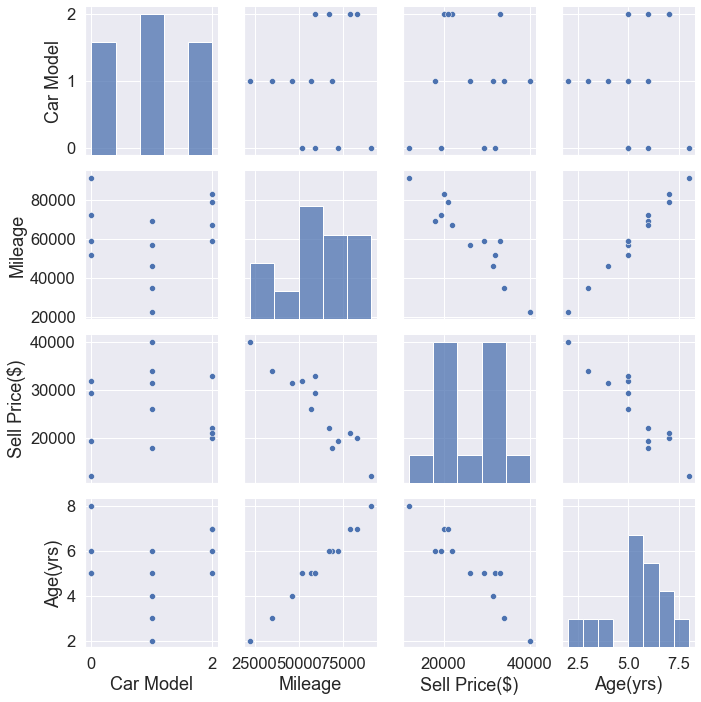

In [51]:
# Plotting pair plot.
sns.pairplot(df)

In [8]:
# finding null values.
df.isnull().sum()

Car Model        0
Mileage          0
Sell Price($)    0
Age(yrs)         0
dtype: int64

<AxesSubplot:>

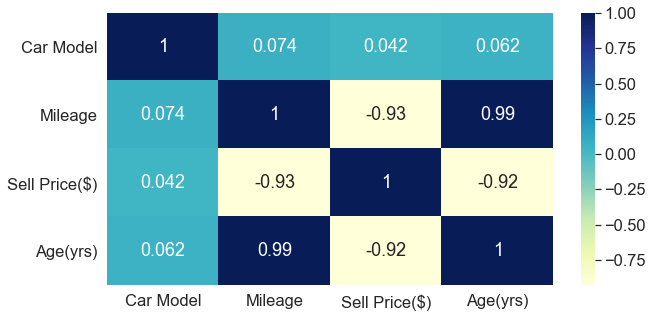

In [50]:
# plotting heatmap of correlation of features.
plt.figure(figsize=(10,5))
sns.set(font_scale=1.5)
corr =df.corr()
sns.heatmap(corr,annot=True,cmap='YlGnBu')

### Dummies


In [10]:
# dummifing 'Car Model'.
dummies = pd.get_dummies(df['Car Model'])
dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [11]:
# Concating both the data set.
df_dummies = pd.concat([df,dummies],axis=1)
df_dummies

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [12]:
# Dropping variable .
df_final = df_dummies.drop(['Car Model','Mercedez Benz C class'],axis=1)
df_final

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


In [13]:
# separing independent & dependent variable.
x =df_final.drop('Sell Price($)',axis=1)
y= df_final['Sell Price($)']

In [14]:
from sklearn.linear_model import LinearRegression # importing linearRegression.

In [15]:
lr =LinearRegression() 

In [16]:
lr.fit(x,y) # fitting x & y.

LinearRegression()

In [17]:
lr.predict([[45000,4,0,0]])  # predicting the price of 'Mercedez Benz C class' for mileage:45000,age:4.

array([36991.31721061])

In [18]:
lr.predict([[86000,7,0,1]]) # predicting the price of 'BMW X5' for mileage:86000,age:7.

array([11080.74313219])

In [19]:
lr.score(x,y),print(':Score of linear model') # Score of the model.

:Score of linear model


(0.9417050937281083, None)

### One hot encoder

In [20]:
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [21]:
from sklearn.preprocessing import LabelEncoder # importing lebal encoder
encoder = LabelEncoder()

In [22]:
df['Car Model'] = encoder.fit_transform(df['Car Model']) # encoding 'Car Model' variable

In [23]:
df


,Car Model,Mileage,Sell Price($),Age(yrs)
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


In [24]:
X=df[['Car Model','Mileage','Age(yrs)']].values # creating array for independent variable.

In [25]:
X

array([[    1, 69000,     6],
       [    1, 35000,     3],
       [    1, 57000,     5],
       [    1, 22500,     2],
       [    1, 46000,     4],
       [    0, 59000,     5],
       [    0, 52000,     5],
       [    0, 72000,     6],
       [    0, 91000,     8],
       [    2, 67000,     6],
       [    2, 83000,     7],
       [    2, 79000,     7],
       [    2, 59000,     5]], dtype=int64)

In [26]:
Y = df['Sell Price($)'] # seperating target variable.

In [27]:
Y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [28]:
# importing OneHotEncoder & ColumnTransformer .
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [29]:
ct = ColumnTransformer([('Sell Price($)',OneHotEncoder(),[0])],remainder='passthrough')

In [30]:
X =ct.fit_transform(X)

In [31]:
X

array([[0.00e+00, 1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [32]:
X = X[:,1:] # dropping first column to protect from multi-collinearity.

In [33]:
X

array([[1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [34]:
lr.fit(X,y) # fitting model

LinearRegression()

In [43]:
lr.predict([[0,1,45000,4]])  # predicting the price of 'Mercedez Benz C class' for mileage:45000,age:4.

array([36991.31721062])

In [36]:
lr.score(X,y) # score of model.

0.9417050937281082

In [46]:
lr.predict([[1,0,86000,7]])  # predicting the price of 'BMW X5' for mileage:86000,age:7.

array([11080.74313219])